# Check actin intensity distribution

Load the QC-normalized single-cell profiles and compare the distribution of actin intensity between cells labeled `Healthy` and `Failing`.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.figsize": (8, 5), "figure.dpi": 100})
sns.set_style("whitegrid")

In [2]:
# Load the QC-normalized single-cell parquet file
repo_root = Path("..")  # notebook is in 4.EDA
sc_path = (
    repo_root
    / "3.preprocessing_profiles"
    / "data"
    / "single_cell_profiles"
    / "CARD-CelIns-CX7_251023130003_sc_normalized.parquet"
)
print("Loading:", sc_path)
df = pd.read_parquet(sc_path)
print("Loaded rows:", len(df))

Loading: ../3.preprocessing_profiles/data/single_cell_profiles/CARD-CelIns-CX7_251023130003_sc_normalized.parquet
Loaded rows: 10849


Unique labels in Metadata_cell_type : ['Healthy' 'Failing']
Rows after filtering to Healthy/Failing: 10849
Plot saved to: ../4.EDA/figures/actin_intensity_healthy_vs_failing.png


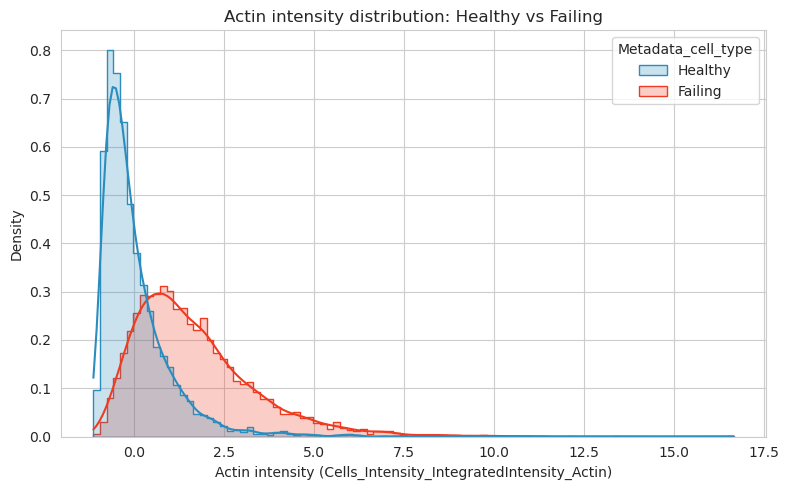


Summary statistics for actin intensity:
                    count      mean    median       std
Metadata_cell_type                                     
Failing              6789  1.673695  1.326244  1.685446
Healthy              4060  0.029913 -0.258839  0.975580


In [3]:
# Set actin_col and metadata_col to create plot
actin_col = "Cells_Intensity_IntegratedIntensity_Actin"
metadata_col = "Metadata_cell_type"

# Filter and plot distributions for Healthy vs Failing
if actin_col is None:
    raise ValueError(
        "No actin-related column found in the parquet file. Inspect the printed candidates above."
    )
if metadata_col is None:
    raise ValueError(
        "No metadata cell-type column found. Inspect the dataframe columns to locate a suitable column."
    )

# Standardize expected labels
labels = df[metadata_col].astype(str).unique()
print("Unique labels in", metadata_col, ":", labels[:30])

# Filter to Healthy and Failing (case-insensitive matching)
df[metadata_col] = df[metadata_col].astype(str)
mask = df[metadata_col].str.lower().isin(["healthy", "failing"])
df_subset = df.loc[mask, [metadata_col, actin_col]].dropna()
print("Rows after filtering to Healthy/Failing:", len(df_subset))

if df_subset.empty:
    raise ValueError(
        "No rows found for Healthy or Failing labels. Check the metadata labels printed above."
    )

# Convert to numeric if needed
df_subset[actin_col] = pd.to_numeric(df_subset[actin_col], errors="coerce")

# Plot using seaborn
plt.figure()
sns.histplot(
    data=df_subset,
    x=actin_col,
    hue=metadata_col,
    stat="density",
    common_norm=False,
    element="step",
    kde=True,
    palette=["#2b8cbe", "#f03b20"],
)
plt.xlabel(f"Actin intensity ({actin_col})")
plt.ylabel("Density")
plt.title("Actin intensity distribution: Healthy vs Failing")
plt.tight_layout()

# Save plot
output_plot_dir = repo_root / "4.EDA" / "figures"
output_plot_dir.mkdir(parents=True, exist_ok=True)
output_plot_path = output_plot_dir / "actin_intensity_healthy_vs_failing.png"
plt.savefig(output_plot_path)
print("Plot saved to:", output_plot_path)

plt.show()

# Summary statistics
summary = (
    df_subset.groupby(df_subset[metadata_col].str.title())[actin_col]
    .agg(["count", "mean", "median", "std"])
    .rename_axis(metadata_col)
)
print("\nSummary statistics for actin intensity:")
print(summary)